In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.ticker as ticker

%matplotlib inline

In [3]:
data_frame = pd.read_csv('/mnt/c/Users/user/Desktop/Project/US1.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/user/Desktop/Project/US1.csv'

In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  object 
 1   Severity               50000 non-null  int64  
 2   Start_Time             50000 non-null  object 
 3   End_Time               50000 non-null  object 
 4   Start_Lat              50000 non-null  float64
 5   Start_Lng              50000 non-null  float64
 6   End_Lat                50000 non-null  float64
 7   End_Lng                50000 non-null  float64
 8   Distance(mi)           50000 non-null  float64
 9   Description            50000 non-null  object 
 10  Number                 9089 non-null   float64
 11  Street                 50000 non-null  object 
 12  Side                   50000 non-null  object 
 13  City                   49996 non-null  object 
 14  County                 50000 non-null  object 
 15  St

In [14]:
data_frame.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

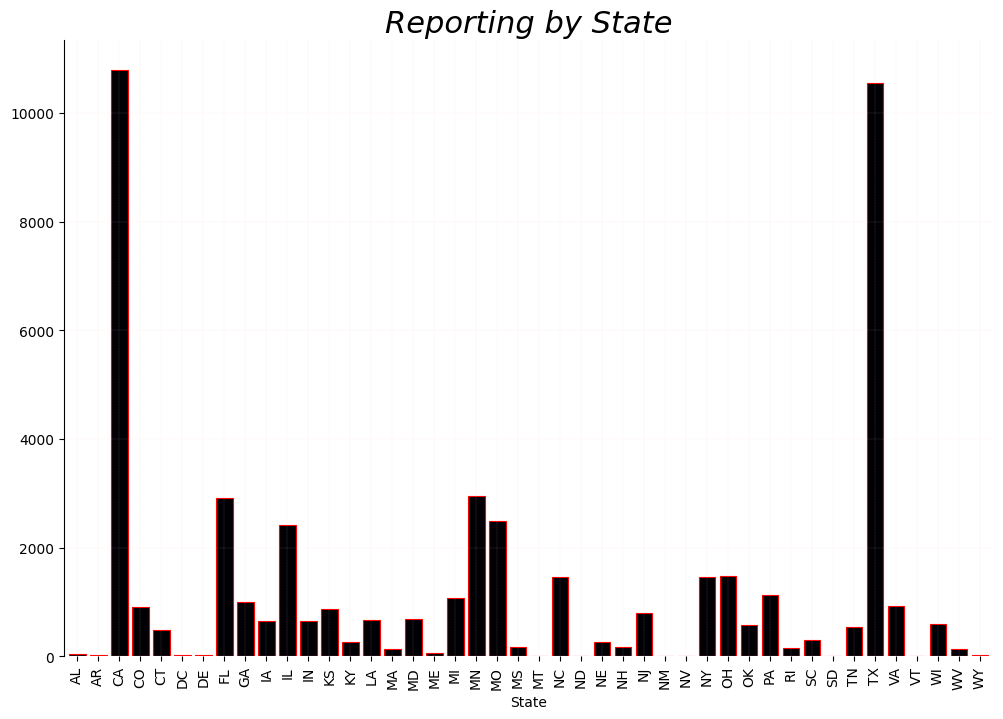

In [15]:
# reported by states
fig, ax = plt.subplots(figsize = (12, 8))
data_frame.groupby('State').size().plot( kind = 'bar',
                                colormap = 'magma',
                                edgecolor = 'r',
                                linewidth = 0.8,
                                width = 0.8, 
                                align = 'center')
ax.set_title('Reporting by State', fontsize = 22, style = 'italic')
ax.grid(linestyle=':', linewidth = '0.2', color = 'pink')
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False);

In [16]:
state_count = data_frame.value_counts(data_frame['State'])
fig = go.Figure(data = go.Choropleth(
                                    locations = state_count.index,
                                    z = state_count.values.astype(float),
                                    locationmode = 'USA-states',
                                    colorscale = 'YlOrRd',
                                    colorbar_title = 'Count',))


fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope = 'usa')

fig.show()

In [17]:
heat_map = px.density_mapbox (data_frame, lat = 'End_Lat', lon = 'End_Lng', z = 'Severity',
                         radius = 10,
                        center = dict(lat = 0, lon = 180), zoom = 0, 
                        mapbox_style = 'stamen-terrain')
heat_map.show()